#### We use pandas library in python to read in the csv file. This creates a pandas dataframe and assigns it to the titanic variable

In [1]:
import numpy as np
import pandas as pd

titanic = pd.read_csv('d:/titanic_train.csv')

# print the first 5 rows of the dataframe.
print(titanic['Age'].median())
# .describe() gives the mean, standard deviation, min, max for all 
# columns that have numerical values
print(titanic.describe())

28.0
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


C:\Users\Vanshdeep Sharma\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


- We now have to convert our non-numeric columns (Name, Sex, Cabin, Embarked and Ticket) to numeric so as to make sense of them. 

In [2]:
# Find all the unique genders -- the column appears to contain only male and female.
print(titanic["Sex"].unique())

# Replace all the occurences of male with 0 and female with 1.
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1
print(titanic['Sex'].head())

['male' 'female']
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object


In [3]:
# Now replace all the unique values in Embarked (S, C, and Q) with 0, 1, 2
# Replace all nan with 'S'
print(titanic['Embarked'].unique())
titanic['Embarked'] = titanic['Embarked'].fillna('S')

titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

titanic['Embarked'].head()


['S' 'C' 'Q' nan]


0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: object

### Linear Regression 
- We use it for making close estimate predicitons. Linear regression follows the equation y =mx + b where y is the value we are trying to predict, m is a coefficient called the slope, x is the value of a column and b is a constant called the intercept.
- This simple model can predict survival fairly well, hence linear regression can be a very powerful algorithm.

### Cross Validation
- We use cross validation to train the algorithm on different data than we make predictions on. This is critical if we want to avoid overfitting. To cross validate, you split your data into some number of parts ('folds'), let us assume 3 parts.
- Combine the first two parts, train a model, make predictions on the third.
- Combine the first and third parts, train the model, make predictions on the second
- Combine the second and third parts, train the model, make predictions on the first
- This way we generate predictions for the whole dataset without ever evaluating accuracy on the same data we train out model using.



In [4]:
# Import linear regression and cross validation from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

titanic['Age'] = titanic['Age'].fillna(0)
titanic['SibSp'] = titanic['SibSp'].fillna(0)
titanic['Parch'] = titanic['Parch'].fillna(0)
titanic['Fare'] = titanic['Fare'].fillna(0)

# Columns we use for predicting the target
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Initialize the algorithm
alg = LinearRegression()

# Generate Cross validation folds for the titanic dataset.
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

predictions = []

for train, test in kf:
    # we only take the rows in the train fold
    train_predictors = titanic[predictors].iloc[train,:]
    # The target we use to train the algorithm
    train_target = titanic['Survived'].iloc[train]
    # Training the algorithm using the predictors and target
    alg.fit(train_predictors, train_target)
    # We can now make the predictions on test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
    
print(predictions)


[array([  6.04646972e-02,   9.60063387e-01,   5.84639401e-01,
         9.30785891e-01,   6.37667072e-02,   1.93126970e-01,
         4.18587747e-01,   2.16701169e-02,   5.31894732e-01,
         8.04998591e-01,   5.78039298e-01,   9.02044320e-01,
         9.50519534e-02,  -9.50932900e-02,   6.09638639e-01,
         7.15721816e-01,   5.10684222e-02,   3.27054646e-01,
         5.48243209e-01,   6.66678021e-01,   2.59373023e-01,
         2.56141421e-01,   6.63818886e-01,   4.66122886e-01,
         5.11308692e-01,   4.09191082e-01,   1.64525347e-01,
         4.35709259e-01,   6.95042779e-01,   1.36702544e-01,
         4.66010001e-01,   1.07009313e+00,   6.94989933e-01,
         1.88377007e-01,   4.83220770e-01,   4.13583512e-01,
         1.64527065e-01,   9.29662703e-02,   5.45268417e-01,
         6.09032704e-01,   5.25985149e-01,   7.46077379e-01,
         1.64799719e-01,   7.80677042e-01,   6.55414800e-01,
         1.36765615e-01,   1.65918507e-01,   6.94989933e-01,
         1.10260088e-01

- We now evaluate the errors, the metrics will basically ivolve finding the number of values in predictions that are exactly same as their counterparts in titanic['Survived'] and then dividing by the total number of passengers.

In [5]:
''' The predictions are in three different numpy arrays, we concatenate them into one.
We concatenate them on axis 0, as they only have one axis '''

predictions = np.concatenate(predictions, axis = 0)
# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions < .5] = 0

accuracy = sum(predictions[predictions == titanic['Survived']]) / len(predictions)
i = accuracy * 100
print('Accuracy percentage is %s' %i)

Accuracy percentage is 77.8900112233


C:\Users\Vanshdeep Sharma\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


- we have our accuracy percentage, but it's not so good, it's only 77.89% accurate. We can instead use logistic regression, it takes the value output of a linear regression and maps it to a probability value between 0 and 1. 
- The mapping is done using the logit function, passing any function through the logit function will map it to a value between 0 and 1 by 'squeezing' the extreme values.  





In [6]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Initialize our algorithm
alg = LogisticRegression(random_state = 1)

# Compute accuracy score for all cross validation folds
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv = 3)

# Take the mean of the scores
Scores = scores * 100
print(scores.std())
# print(scores.mean())

0.00793610304362


In [7]:
# Now we make all the changes to the test file as we did to the training data
titanic_test = pd.read_csv('d:/titanic_test.csv')
titanic_test['Age'] = titanic_test['Age'].fillna(titanic['Age'].median())

titanic_test.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic_test.loc[titanic['Sex'] == 'female', 'Sex'] = 1

titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')
titanic_test.loc[titanic_test['Embarked'] == 'S', 'Embarked'] = 0
titanic_test.loc[titanic_test['Embarked'] == 'C', 'Embarked'] = 1
titanic_test.loc[titanic_test['Embarked'] == 'Q', 'Embarked'] = 2

titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic['Fare'].median())

### Random Forest 
- Here we build hundreds of trees with slightly randomized input data, and slightly randomized split points. Each tree in an random forest gets a random subset of the overall training data. 
- Each split point in each tree is performed on a random subset of the potential columns to split on. By averaging the predictions of all the trees, we get a stronger overall prediction and minimize overfitting.

In [8]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Initialize the algorithm with the default values
# n_estimators is the number of tree we want to make
# min_samples_split is the minimun number of row we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends

alg = RandomForestClassifier(random_state = 1, n_estimators = 10, 
                            min_samples_split = 2, min_samples_leaf = 1)
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

scores = cross_val_score(alg, titanic[predictors], titanic['Survived'], cv = kf)
scores.mean()

0.80022446689113347

- An easy way to generate features is to use the .apply() on pandas dataframes. This applies a function you pass in to each element in a dataframe or a  series. 
- To write a lambda function, you write lambda x: len(x). x will take on the value of the input that is passed in -- in this case the ticket length. The function to the right of the colon is then applied to x and the result is returned. 
- The .apply method takes all the outputs and constructs a pandas series from them. We can assign this series to a dataframe series.

In [9]:
# Generating  a familysize column
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# The .apply method generates a new series
titanic['TicketLength'] = titanic['Ticket'].apply(lambda x:len(x))


In [19]:
titanic['FamilySize']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: FamilySize, dtype: int64

- We can also extract the title of the passengers from their names. There are very few commonly used titles, and a 'long tail' of one-off titles that only one or two passengers have. 
- We first extract all titles using regular expression and then map each unique title to an integer value. We'll then have a numeric column that corresponds to the appropriate Title

In [10]:
import re

def get_title(name):
    # Use regular expression to search for title
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If title exists extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all titles and print how often they occur
titles = titanic['Name'].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer. Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5,
                 'Rev': 6, 'Major': 7, 'Col': 7, 'Mlle': 8, 'Mme': 8,
                 'Don': 9, 'Lady': 10, 'Countess': 10, 'Jonkheer': 10,
                 'Sir': 9, 'Capt': 7, 'Ms': 2}

for k, v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything
print(pd.value_counts(titles))

# Add in the title column
titanic['Title'] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Capt          1
Sir           1
Lady          1
Don           1
Mme           1
Ms            1
Jonkheer      1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [17]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id from a row
def get_family_id(row):
    # Find the last name
    last_name = row['Name'].split(',')[0]
    # Create the family id
    family_id = '{0}{1}'.format(last_name, row['FamilySize'])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), 
                              key = operator.itemgetter(1))[1] + 1)
            family_id_mapping[family_id] = current_id
       # return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = titanic.apply(get_family_id, axis = 1)

# Compress all the families under 3 members into one code
family_ids[titanic['FamilySize'] < 3] = -1

# Print the count of each unique id
print(pd.value_counts(family_ids))

titanic['FamilyId'] = family_ids

-1    800
dtype: int64


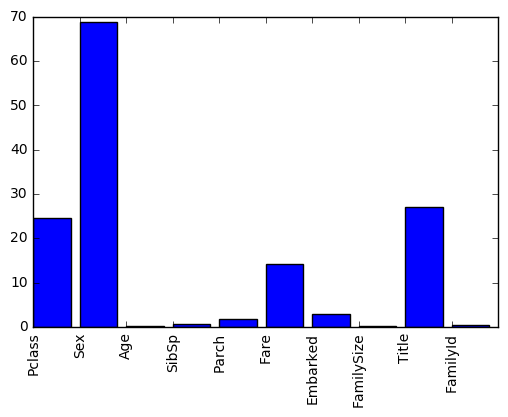

0.81930415263748602

In [27]:
# sklearn has a function that helps us with feature selection, SelectKBest. This selects the best features from the data, and allows us to specify how many it selects
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

titanic['FamilyId'] = titanic['FamilyId'].fillna(0)
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
              'FamilySize', 'Title', 'FamilyId']

# perform feature selection
selector = SelectKBest(f_classif, k = 5)
selector.fit(titanic[predictors], titanic['Survived'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores, see how 'Pclass', 'Sex', 'Title' and 'Fare' are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation = 'vertical')
plt.show()

# Pick only the four best
predictors = ['Pclass', 'Sex', 'Fare', 'Title']

alg = RandomForestClassifier(random_state = 1, n_estimators = 50,
                             min_samples_split = 8, min_samples_leaf = 4)
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)
scores = cross_val_score(alg, titanic[predictors], titanic['Survived'], cv = kf)
scores.mean()

### Gradient Boosting
- It involves training decision trees one after the other and feeding the errors from one tree into the next tree. 
- So each tree is building on all the other trees that came before it. We'll try boosing instead of out Random Forest approach and see if we can improve our accuracy, we'll limit the tree depth to 3 to avoid overfitting.

### Ensembling
- Here we generate predictions using information from a set of classifiers, instead of just one, in practice this means we average their predictions.
- In this case we'll ensemble logistic regression trained on the most linear predictors and a gradient boosted tree trained on all of the predictors.
- We'll keep things simple when we ensemble -- we'll average the raw probabilities from 0 to 1 that we get from our classifiers and then assume anything above .5 maps to one and anything below .5 maps to 0.


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble
# We'll use linear predictors from logistic regression and everything with gradient boosting classifier

algorithms = [[GradientBoostingClassifier(random_state = 1, n_estimators = 2,
                                          max_depth = 3), ['Pclass', 'Sex', 'Age',
                                                           'Fare', 'Embarked', 'FamilySize',
                                                           'Title', 'FamilyId']],
              [LogisticRegression(random_state = 1), ['Pclass', 'Sex', 'Fare',
                                                                'FamilySize', 'Title',
                                                                'Age', 'Embarked']]]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

predictions = []
for train, test in kf:
    train_target = titanic['Survived'].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictions in algorithms:
        # Fit the algorithm on the training data
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # select and predict on test fold
        # the astype(float) is necessary to convert the dataframe to all float and avoid sklearn error
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
        # Use a simple ensembling scheme -- just average the predictions to get the final classifications
        test_predictions = (full_test_predictions[0]) / 2
        # Any values above .5 are assumed 1 and below .5 are assumed 0
        test_predictions[test_predictions <= .5] = 0
        test_predictions[test_predictions > .5] = 1
        predictions.append(test_predictions)

print(predictions)

['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

- Now we make all the change to the test set

In [52]:
titles = titanic_test['Name'].apply(get_title)

title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4,
                'Dr': 5, 'Rev': 6, 'Major': 7, 'Mlle': 8, 
                'Mme': 8, 'Don': 9, 'Lady': 10, 'Countess': 10,
                'Jonkheer': 10, 'Sir': 9, 'Capt': 7, 'Ms': 2,
                'Dona': 10}
for k, v in title_mapping.items():
    titles[titles == k] = v
titanic_test['Title'] = titles

print(pd.value_counts(titanic_test['Title']))

titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']

print(family_ids)

family_ids = titanic_test.apply(get_family_id, axis = 1)
family_ids[titanic_test['FamilySize'] < 3] = -1
titanic_test['FamilyId'] = family_ids
titanic_test['NameLength'] = titanic_test['Name'].apply(lambda x: len(x))


1      240
2       79
3       72
4       21
Col      2
6        2
10       1
5        1
Name: Title, dtype: int64
0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24     None
25       -1
26       -1
27       -1
28       -1
29       -1
       ... 
388      -1
389    None
390      -1
391      -1
392      -1
393      -1
394    None
395      -1
396      -1
397      -1
398      -1
399      -1
400      -1
401      -1
402      -1
403      -1
404      -1
405      -1
406      -1
407      -1
408      -1
409      -1
410      -1
411      -1
412      -1
413      -1
414      -1
415      -1
416      -1
417      -1
dtype: object


### Using the analysis let's now make predictions on the test set

In [65]:
titanic_test['FamilySize'] = titanic_test['FamilySize'].fillna(0)
titanic_test['FamilyId'] = titanic_test['FamilyId'].fillna(0)

predictors = ['Pclass', 'Age', 'Fare', 'Embarked', 'FamilySize',
              'FamilyId']

algorithm = [
    [GradientBoostingClassifier(random_state = 1, n_estimators = 25, max_depth = 3),
     predictors],
[LogisticRegression(random_state = 1), ['Pclass', 'Fare', 'FamilySize', 
                                       'Age', 'Embarked']]
    ]

full_predictions = []
for alg, predictors in algorithm:
    # fit the algorithm using the full training data
    alg.fit(titanic[predictors], titanic['Survived'])
    # Predict using the test dataset. We have to convert all the columns to floats to avoid an error
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'],
                          'Survived': predictions})
submission.to_csv('Kaggle.csv', index = False)
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         1
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         1
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         1
392         1284         0
3